<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

ライブラリ,データのインポート

In [2]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


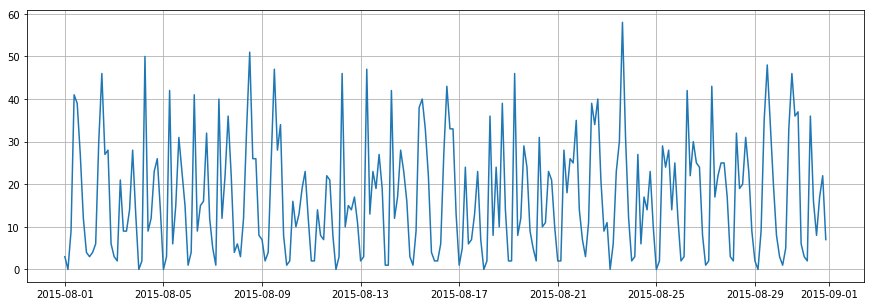

In [3]:
citibikes = mglearn.datasets.load_citibike()
fig = plt.figure(figsize=(15,5))
plt.grid()
plt.plot(citibikes)

In [40]:
citibikes[:8]

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
2015-08-01 15:00:00    27
2015-08-01 18:00:00    12
2015-08-01 21:00:00     4
Freq: 3H, Name: one, dtype: int64

In [ ]:
フーリエ変換を使うと信号を分離できる(顕著な周波数がわかる)

Text(0, 0.5, 'amplitude')

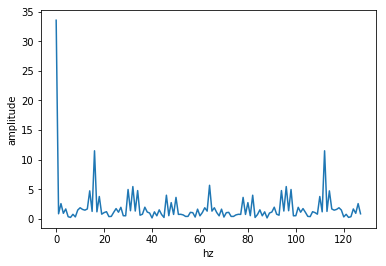

In [6]:
import matplotlib.pyplot as plt
F = np.fft.fft(citibikes[:128])
F_abs = np.abs(F)/128*2
plt.plot(F_abs)
plt.xlabel("hz")
plt.ylabel("amplitude")
#i_f = np.fft.ifft(F)
#plt.plot(i_f.real)
# 逆フーリエ変換をかければもとの信号を復元できる.

In [66]:
y = citibikes.values
X = citibikes.index.values.astype("int64").reshape(-1,1)
n_train = 184

X_train = X[:n_train]
X_test = X[n_train:]
y_train = y[:n_train]
y_test = y[n_train:]


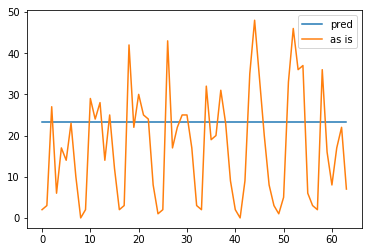

In [83]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators =100, random_state=11)
reg.fit(X_train,y_train)
plt.plot(reg.predict(X_test),label="pred")
plt.plot(y_test,label="as is")
plt.legend()

Point RandomForestはレンジの外ではうまく予測できない.

0.8429376413436872

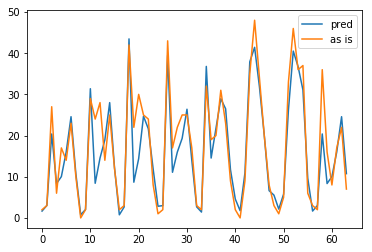

In [99]:
X_hour = citibikes.index.hour.values.reshape(-1,1)
reg = RandomForestRegressor(n_estimators =100, random_state=22)
X_hour_train = X_hour[:n_train]
X_hour_test = X_hour[n_train:]


X_hour_week = np.hstack([citibikes.index.dayofweek.values.reshape(-1,1),X_hour])

X_hour_week_encoded
X_hour_week_train = X_hour_week[:n_train]
X_hour_week_test = X_hour_week[n_train:]
reg.fit(X_hour_week_train,y_train)
plt.plot(reg.predict(X_hour_week_test),label="pred")
plt.plot(y_test,label="as is")
plt.legend()
reg.score(X_hour_week_test,y_test)

In [ ]:
時間データ、曜日データを渡すと予測精度がかなり改善する.

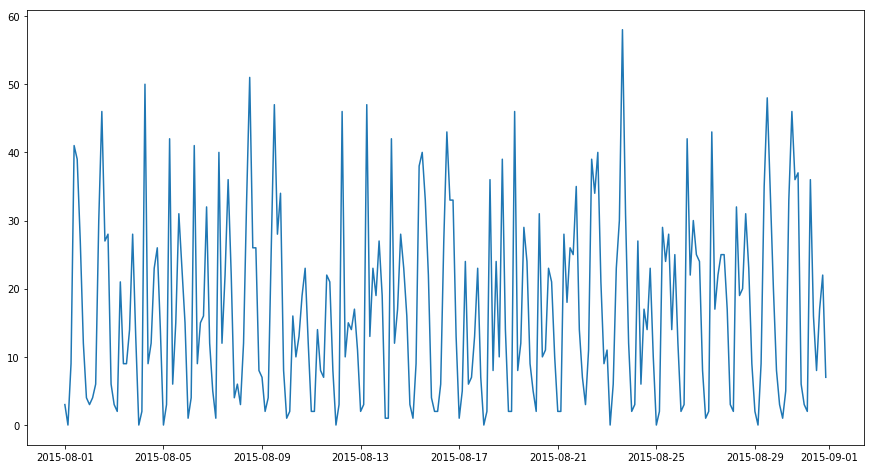

In [8]:
plt.figure(figsize=(15,8))
plt.plot(citibikes)

In [9]:
import statsmodels.api as sm

In [11]:
result = sm.tsa.seasonal_decompose(citibikes)

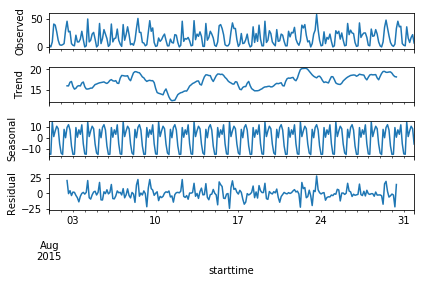

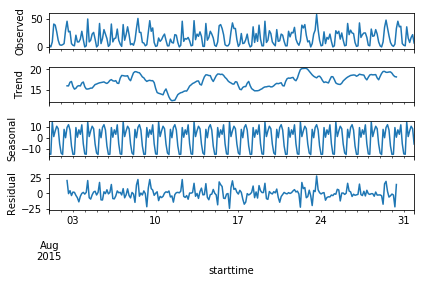

In [17]:
dir(result) # dirでオブジェクトの持つattributesが確認できる.
result.plot()

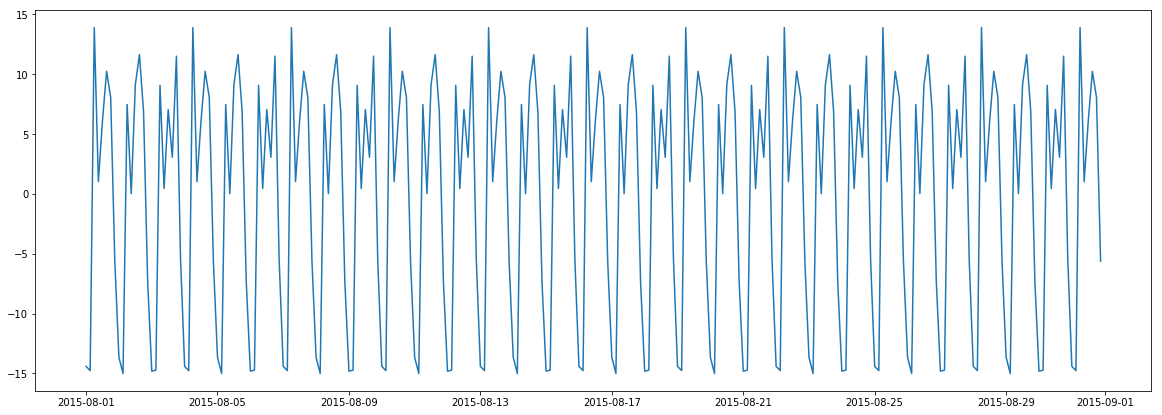

In [24]:
plt.figure(figsize=(20,7))
plt.plot(result.seasonal)


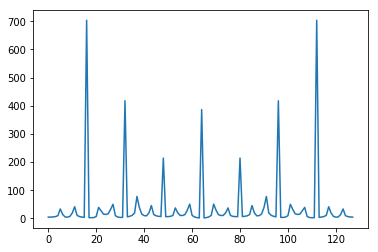

In [22]:
plt.plot(np.abs(np.fft.fft(result.seasonal[:128])))

In [34]:
citibikes_acf = sm.tsa.stattools.acf(citibikes,nlags = 40)

0.3706639716917654

lag が１の時の自己相関の値は一日前の値が今日にどれくらい影響を与えているか.
lag が nの時の自己相関の値はn日前の値が今日にどれくらい影響を与えているか.をあらわす.
lag=0 は自分自身との相関なので常に１.

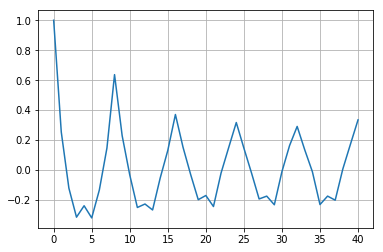

In [32]:
plt.plot(citibikes_acf)
# ラグ=8の自己相関が最大. 1日単位(8の倍数)の周期性がある.

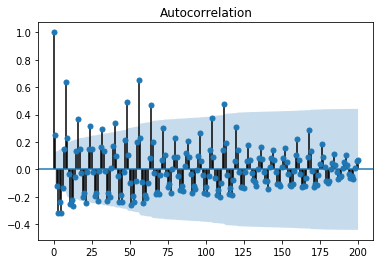

In [40]:
sm.graphics.tsa.plot_acf(citibikes,lags=200)
plt.show()

95%信頼区間外のデータは統計的に有意差がある値とみなせる.
(つまり、「偶然ではありえないほど稀」=>「なんらかの関係性がある」という背理法の考え方)
8の倍数、56の倍数で高い自己相関＝＞日単位、週単位の周期性の仮説が支持されている.